<h1><b>Speed Improvement of PyTorch vs Plain Python for Matrix Multiplication</b></h1>

In [205]:
import random

def generateMatrices(m: int) -> tuple[list[list[float]], list[list[float]]]:
    W = [[random.random() for _ in range(m)] for _ in range(90)];
    X = [[random.random() for _ in range(110)] for _ in range(m)];

    return W, X;

In [206]:
def multiplyMatrices(A: list[list[float]], B: list[list[float]]) -> list[list[float]]:
    """
        Multiplies two matrices A and B using plain python for-loops.
    """
    if len(A[0]) != len(B):
        raise ValueError("Matrix dimensions are not compatible: number of columns of matrix A must equal the number of rows of matrix B!");

    # Init result matrix with all 0s
    C = [[0 for _ in range(len(B[0]))] for _ in range(len(A))];

    # Perform matrix multiplication
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j];
    
    return C;

In [207]:
import torch

def convertToTensor(W, X):
    W_t = torch.tensor(W);
    X_t = torch.tensor(X);

    return W_t, X_t;

In [208]:
m_vals = [m for m in range(10, 110, 10)];
matrices = [generateMatrices(m) for m in m_vals];

pyTimeResults = [];
tensorTimeResults = [];
for W, X in matrices:
    # Create the tensor matrices
    W_t, X_t = convertToTensor(W, X);

    # Time the plain Python matrix multiplication
    pythonTime = %timeit -o multiplyMatrices(W, X);
    pyTimeResults.append(pythonTime.average);

    # Time the torch matrix multiplication
    tensorTime = %timeit -o W_t.matmul(X_t);
    tensorTimeResults.append(tensorTime.average);


21.9 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
24.7 μs ± 7.46 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
40.7 ms ± 4.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
24.4 μs ± 1.44 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
55.6 ms ± 813 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
24.9 μs ± 1.05 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
72.6 ms ± 635 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
27.1 μs ± 2.72 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
92 ms ± 4.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
29.1 μs ± 1.48 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
109 ms ± 4.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
30.8 μs ± 1.64 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
126 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
33.3 μs ± 1.86 μs per loop (mean ± std. dev. of 7 runs, 10,

In [209]:
print("Average Time results for timeit tests on regular python matrices:");
print(pyTimeResults);

Average Time results for timeit tests on regular python matrices:
[0.02194325428572483, 0.04067932000034489, 0.05562064714301544, 0.07257928000014675, 0.0919591871429085, 0.10945918000028801, 0.12607538285686, 0.14421578714245697, 0.16206269857128583, 0.17928888571415363]


In [210]:
print("Average Time results for timeit tests on tensor matrices:");
print(tensorTimeResults);

Average Time results for timeit tests on tensor matrices:
[2.469240571476153e-05, 2.4358931428495062e-05, 2.4857308571725818e-05, 2.7050777142825868e-05, 2.912901999994314e-05, 3.0784302856981025e-05, 3.328427285700205e-05, 3.5271571428373656e-05, 3.8860460000536737e-05, 4.182551857167189e-05]


<h3><b>Visualizing the speed improvements as a ratio</b></h2>

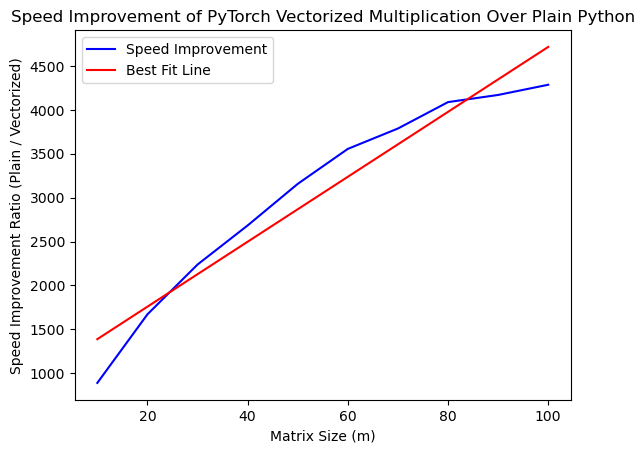

In [211]:
import matplotlib.pyplot as plt
import numpy as np

speedImprovementRatio = [py / tensor for py, tensor in zip(pyTimeResults, tensorTimeResults)];

# Compute the line of best fit using least squares solution
A = np.column_stack((np.ones(len(m_vals)), m_vals)); # Col of 1s and m_vals
b = np.array(speedImprovementRatio); # Vertical vector of ratios

x_star = np.linalg.inv(A.T @ A) @ (A.T @ b); # x* = (A' * A)^-1 * A' * b

alpha = x_star[0];
beta = x_star[1];

bestFitLine = [alpha + beta * m for m in m_vals]; # Formulate the best fit line

plt.plot(m_vals, speedImprovementRatio, color='b', label="Speed Improvement");
plt.plot(m_vals, bestFitLine, color='r', label="Best Fit Line");

# plt.xticks(m_vals);
plt.xlabel("Matrix Size (m)");
plt.ylabel("Speed Improvement Ratio (Plain / Vectorized)");
plt.title("Speed Improvement of PyTorch Vectorized Multiplication Over Plain Python");
plt.legend();
plt.show();

<h3><b>Visualizing the time difference</b></h2>

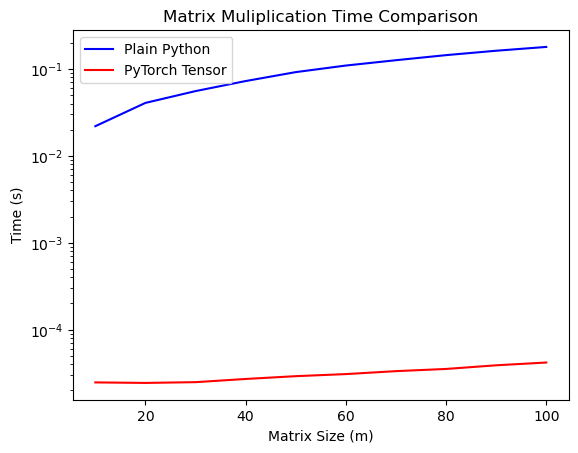

In [212]:
plt.plot(m_vals, [p for p in pyTimeResults], color='b', label="Plain Python");
plt.plot(m_vals, [t for t in tensorTimeResults], color='r', label="PyTorch Tensor");

# plt.xticks(m_vals);
plt.xlabel("Matrix Size (m)");
plt.ylabel("Time (s)");
plt.yscale("log");
plt.title("Matrix Muliplication Time Comparison");
plt.legend();
plt.show();